In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson
from iminuit import Minuit
from iminuit.cost import LeastSquares
import math

In [5]:
#Dati

F = [100, 500, 1000, 1500, 2500, 2800, 3000, 3100, 3150, 3200, 3250, 3300, 3350, 3400, 3500, 4000, 5000, 10000, 50000, 100000, 300000] #Hz
R = 99.93 #Ohm
C = 225.7 * 10**(-9) #F
L = 10.08 * 10**(-3) #H

F0_att = 1/(math.sqrt(L*C)*2*math.pi)
Q_att = 1/R * (L/C)**0.5
print("F0 atteso vale {} Hz".format(F0_att))
print("Q atteso vale {}".format(Q_att))

F0 atteso vale 3336.753203172464 Hz
Q atteso vale 2.114796578550636


In [6]:
#Attenuazione

Vin = [5.22, 5.17, 5.14, 4.94, 4.64, 3.84, 3.73, 3.68, 3.68, 3.68, 3.68, 3.62, 3.68, 3.67, 3.68, 3.89, 4.47, 5.05, 5.12, 5.12, 5.14] #Volt

l=len(Vin)

errVin = [0.01 for i in range(l)]  #Volt

Vout = [76.8 * 10**(-3), 376 * 10**(-3), 784 * 10**(-3), 1.24, 1.83, 2.67, 2.76, 2.81, 2.83, 2.85, 2.87, 2.82, 2.84, 2.82, 2.78, 2.55, 2.04, 0.871, 0.164, 0.0797, 0.01406] #Volt
errVout = [0.01 for i in range(l)] #Volt

A = [Vout[i]/Vin[i] for i in range(l)]
errA = [A[i]*np.sqrt((errVin[i]/Vin[i])**2+(errVout[i]/Vout[i])**2) for i in range(l)]

#fase

phigrad = [180-92, 180-97, 180-104, 180-112, 180-122, 180-155, 180-166, 180-171, 180-173, 180-177, 0, -2, -5, -8, 166-180, 146-180, 125-180, 102-180, 93-180, 92-180, 92-180] #gradi
errphigrad = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] #gradi
phi = np.array(phigrad)/180 * np.pi
errphi = np.array(errphigrad)/180 * np.pi


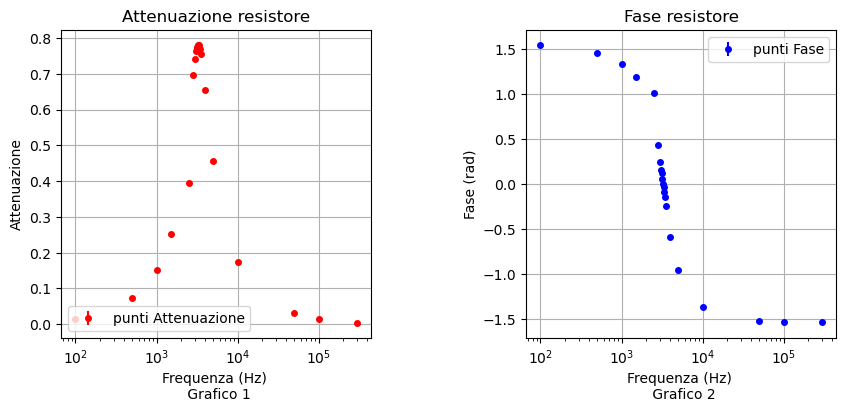

In [7]:
#Grafici

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

#attenuazione
axes[0].errorbar(F, A, yerr = errA, label='punti Attenuazione', color='red', markersize = 4, fmt = 'o')
axes[0].set_title('Attenuazione resistore')
axes[0].set_xscale('log')
axes[0].grid(True)
axes[0].set_xlabel("Frequenza (Hz) \n Grafico 1")
axes[0].set_ylabel("Attenuazione")
axes[0].legend()

#fase
axes[1].errorbar(F, phi, yerr = errphi, label='punti Fase', color='blue', markersize = 4, fmt = 'o')
axes[1].set_title('Fase resistore')
axes[1].set_xscale('log')
axes[1].grid(True)
axes[1].set_xlabel("Frequenza (Hz) \n Grafico 2")
axes[1].set_ylabel("Fase (rad)")
axes[1].legend()

fig.subplots_adjust(wspace=0.5)

In [8]:
#Fit Attenuazione
def Att(F, R0, C0, L0):
    return (R0/(np.sqrt(R0**2+((L0*2*np.pi*F)-(1/(2*F*np.pi*C0)))**2)))
least_squares = LeastSquares(F, A, errA, Att)
m = Minuit(least_squares, R0 = R, C0 = C, L0 = L)
m.migrad()
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.949e+04 (χ²/ndof = 1082.5)│             Nfcn = 2464              │
│ EDM = 2.73e-10 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ R0   │    86     │     4     │     -4     │     4      │         │         │       │
│ 1 │ C0   │  176e-9   │   8e-9    │   -8e-9    │    8e-9    │         │         │       │
│ 2 │ L0   │  10.8e-3  │  0.5e-3   │  -0.5e-3   │   0.5e-3   │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │          R0           │          C0           │          L0           │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │    -4     │     4     │   -8e-9   │   8e-9    │  -0.5e-3  │  0.5e-3   │
│  Valid   │   False   │   False   │   False   │   False   │   False   │   False   │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌────┬─────────────────────────────────────────────────┐
│    │              R0              C0              L0 │
├────┼─────────────────────────────────────────────────┤
│ R0 │            14.7 -29.82027990e-9      1.81843e-3 │
│ C0 │ -29.82027990e-9        6.09e-17    -3.71450e-12 │
│ L0 │      1.81843e-3    -3.71450e-12        2.27e-07 │
└────┴─────────────────────────────────────────────────┘

In [12]:
#Fit Sfase
def phic(F, R0, C0, L0):
    w = 2 * np.pi * F
    return -np.arctan(((L0*w)-(1/(C0*w)))/R0)
least_squares1 = LeastSquares(F, phi, errphi, phic)
m1 = Minuit(least_squares1, R0 = R, C0 = C, L0 = L)
m1.migrad()
m1.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 270.8 (χ²/ndof = 15.0)     │             Nfcn = 6950              │
│ EDM = 3.57e-06 (Goal: 0.0002)    │            time = 0.4 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ R0   │    120    │    60     │    -60     │     60     │         │         │       │
│ 1 │ C0   │  0.23e-6  │  0.12e-6  │  -0.12e-6  │  0.12e-6   │         │         │       │
│ 2 │ L0   │   0.010   │   0.005   │   -0.005   │   0.005    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │          R0           │          C0           │          L0           │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │    -60    │    60     │ -0.12e-6  │  0.12e-6  │  -0.005   │   0.005   │
│  Valid   │   False   │   False   │   False   │   False   │   False   │   False   │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌────┬─────────────────────────────────────────────────┐
│    │              R0              C0              L0 │
├────┼─────────────────────────────────────────────────┤
│ R0 │        3.81e+03 -7.436575262e-6      330.808e-3 │
│ C0 │ -7.436575262e-6        1.45e-14    -646.313e-12 │
│ L0 │      330.808e-3    -646.313e-12        2.88e-05 │
└────┴─────────────────────────────────────────────────┘

Resistenza, capacità e induttanza dal fit dell'attenuazione : 86.47686150620409 +/- 3.8330120686885847 Ohm, 1.7647502757710445e-07 +/- 7.801296431834488e-09 F, 0.010772877973643026 +/- 0.0004763643572556996 H
Resistenza, capacità e induttanza dal fit della fase: 118.29179913901567 +/- 61.72344444984686 Ohm, 2.310886247361585e-07 +/- 1.205366698565014e-07 F, 0.01027966966796565 +/- 0.005362056342375168 H


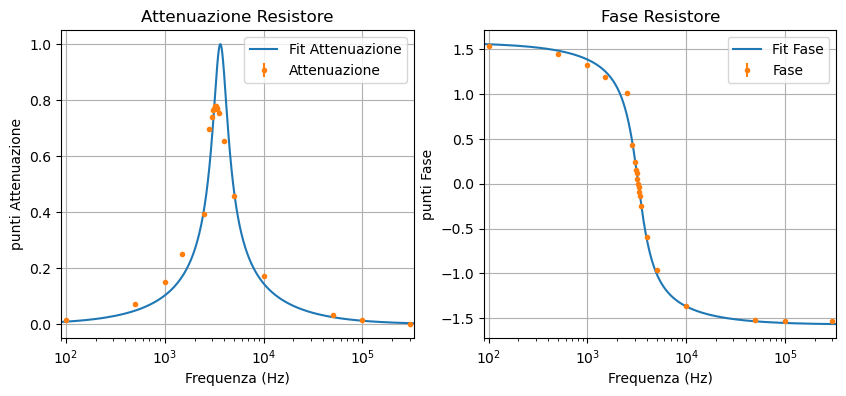

In [13]:
#Valori di fit

R0a, C0a, L0a = m.values[0], m.values[1], m.values[2]
sigmaRa, sigmaCa, sigmaLa = m.errors[0], m.errors[1], m.errors[2]

R0f, C0f, L0f =  m1.values[0], m1.values[1], m1.values[2]
sigmaRf, sigmaCf, sigmaLf = m1.errors[0], m1.errors[1], m1.errors[2]

print("Resistenza, capacità e induttanza dal fit dell'attenuazione : {} +/- {} Ohm, {} +/- {} F, {} +/- {} H".format(R0a, sigmaRa, C0a, sigmaCa, L0a, sigmaLa))
print("Resistenza, capacità e induttanza dal fit della fase: {} +/- {} Ohm, {} +/- {} F, {} +/- {} H".format(R0f, sigmaRf, C0f, sigmaCf, L0f, sigmaLf))

#Grafico con fit

figg, axess = plt.subplots(1, 2, figsize=(10, 4))
x = np.linspace(min(F)*0.9,max(F)*1.1,10000)

#attenuazione
axess[0].plot(x,Att(x,R0a, C0a, L0a), label = 'Fit Attenuazione')
axess[0].set_title('Attenuazione Resistore')

axess[0].set_xscale('log')
axess[0].grid(True)
axess[0].errorbar(F, A, yerr=errA, fmt = 'o', label = 'Attenuazione', markersize = 3)
axess[0].set_xlim(min(F)*0.9,max(F)*1.1)
axess[0].set_xlabel("Frequenza (Hz)")
axess[0].set_ylabel("punti Attenuazione")
axess[0].legend()

#fase
axess[1].plot(x,phic(x,R0f, C0f, L0f), label = 'Fit Fase')
axess[1].set_title('Fase Resistore')

axess[1].set_xscale('log')
axess[1].grid(True)
axess[1].errorbar(F, phi, yerr=errphi, fmt = 'o', label = 'Fase', markersize = 3)
axess[1].set_xlim(min(F)*0.9,max(F)*1.1)
axess[1].set_xlabel("Frequenza (Hz)")
axess[1].set_ylabel("punti Fase")
axess[1].legend()

In [15]:
# F0 di fit dall'attenuazione

w0_a = np.sqrt((1/(L0a*C0a)) - (R0a**2/(2*L0a**2)))
F0_a  = w0_a / (2*np.pi)

dw_dR = - R0a / (2 * L0a**2 * w0_a)
dw_dL = (-L0a + R0a**2 * C0a) / (2 * w0_a * L0a**3 * C0a)
dw_dC = -1 / (2 * L0a * C0a**2 * w0_a)
sigma_w0a = np.sqrt((dw_dR * sigmaRa)**2 + (dw_dL * sigmaLa)**2 + (dw_dC * sigmaCa)**2)
sigma_F0a = sigma_w0a / (2*np.pi)

print("Frequenza caratteristica: ", F0_a, "+/-", sigma_F0a, "Hz")

# Fattore di qualità di fit dall'attenuazione

Q = (1 / R0a) * np.sqrt(L0a / C0a)

dQ_dR = -Q / R0a
dQ_dL =  Q / (2 * L0a)
dQ_dC = -Q / (2 * C0a)
sigma_Q = np.sqrt((dQ_dR * sigmaRa)**2 + (dQ_dL * sigmaLa)**2 + (dQ_dC * sigmaCa)**2)

print("Fattore di qualità: ",  Q, "+/-", sigma_Q)


Frequenza caratteristica:  3536.6094989285634 +/- 111.26914912912896 Hz
Fattore di qualità:  2.8570926346992946 +/- 0.15496938822307915


In [17]:
#Fit parabolico per l'attenuazione
i=7
f=-6
def par(F,a,b,c):
    return a+b*(F*2*np.pi)+c*(F*2*np.pi)**2
least_squaresp = LeastSquares(F[i:f], A[i:f], errA[i:f], par)
mp = Minuit(least_squaresp, a = 0, b = 0, c = 0)
mp.migrad()
mp.minos()
        

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.295 (χ²/ndof = 0.5)      │              Nfcn = 145              │
│ EDM = 1.3e-15 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   -4.0    │    0.9    │    -0.9    │    0.9     │         │         │       │
│ 1 │ b    │  0.47e-3  │  0.08e-3  │  -0.08e-3  │  0.08e-3   │         │         │       │
│ 2 │ c    │ -11.4e-9  │  2.0e-9   │  -2.0e-9   │   2.0e-9   │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │           a           │           b           │           c           │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.9    │    0.9    │ -0.08e-3  │  0.08e-3  │   -2e-9   │   2e-9    │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌───┬──────────────────────────────────────────────┐
│   │              a              b              c │
├───┼──────────────────────────────────────────────┤
│ a │          0.738     -71.319e-6 1.720552934e-9 │
│ b │     -71.319e-6       6.89e-09   -166.391e-15 │
│ c │ 1.720552934e-9   -166.391e-15       4.02e-18 │
└───┴──────────────────────────────────────────────┘

In [44]:
#Risultati del fit parabolico
a, b, c = mp.values['a'], mp.values['b'], mp.values['c']
erra, errb, errc = mp.errors['a'], mp.errors['b'], mp.errors['c']

cov_ab = mp.covariance[('a', 'b')]
cov_ac = mp.covariance[('a', 'c')]
cov_bc = mp.covariance[('b', 'c')]

Amax_p = (4*a*c-b**2)/(4*c)
w0_p = -b/(2*c)
Q_p = b/((2*(b**2-4*a*c))**0.5)

errAmax_p = (
    erra**2
    + (b**2 / (4 * c**2)) * errb**2
    + (b**4 / (16 * c**4)) * errc**2
    - (b / c) * cov_ab
    + (b**2 / (2 * c**2)) * cov_ac
    - (b**3 / (4 * c**3)) * cov_bc
)**0.5

errw0_p = (
    (b**2 / (4 * c**4)) * errc**2
    + (1 / (4 * c**2)) * errb**2
    - (b / (2 * c**3)) * cov_bc
)**0.5

denominator = (b**2 - 4 * a * c)**3
errQ_p = ( 
    (1 / denominator) * (
        2 * b**2 * a**2 * errc**2
        + 8 * a**2 * c**2 * errb**2
        + 2 * b**2 * c**2 * erra**2
        + 4 * c * b**2 * a * cov_ac
        - 8 * c * b * a**2 * cov_bc
        - 8 * c**2 * b * a * cov_ab
    ) )**0.5

print("Dal fit parabolico: \nAmax = {} +/- {}, \nf0 = {} +/- {}, \nQ = {} +/- {}".format(Amax_p, errAmax_p, w0_p/(2*np.pi), errw0_p/(2*np.pi), Q_p, errQ_p))

Dal fit parabolico: 
Amax = 0.7772159514240827 +/- 0.0017275395446003847, 
f0 = 3274.0829906159324 +/- 11.447571675783873, 
Q = 1.7614547386527781 +/- 0.15571647314459533


In [32]:
# fit lineare per la fase
ii = 7
ff = -6
def lin(F,aa,bb):
    return bb+aa*F*2*np.pi
least_squaresf = LeastSquares(F[ii:ff], phi[ii:ff], errphi[ii:ff], lin)
mf = Minuit(least_squaresf, aa = 0 , bb = 0)
mf.migrad()
mf.minos()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.183 (χ²/ndof = 0.2)      │              Nfcn = 77               │
│ EDM = 4.25e-17 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ aa   │  -160e-6  │   8e-6    │   -8e-6    │    8e-6    │         │         │       │
│ 1 │ bb   │   3.28    │   0.16    │   -0.16    │    0.16    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │          aa           │          bb           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -8e-6   │   8e-6    │   -0.16   │   0.16    │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌────┬─────────────────────────┐
│    │          aa          bb │
├────┼─────────────────────────┤
│ aa │    6.19e-11 -1.27581e-6 │
│ bb │ -1.27581e-6      0.0263 │
└────┴─────────────────────────┘

In [38]:
#Risultati del fit lineare
aa, bb = mf.values['aa'], mf.values['bb']
erraa, errbb = mf.errors['aa'], mf.errors['bb']
cov_aabb = mf.covariance[('aa', 'bb')]

Q_l = bb / 2
w0_l = -bb / aa

errQ_l = errbb / 2

errw0_l = np.sqrt(
    (errbb / aa)**2
    + (bb * erraa / aa**2)**2
    - 2 * bb * cov_aabb / aa**3
)

print(
    "Dal fit lineare, f0 = {} +/- {}, Q = {} +/- {}".format(
        w0_l/(2*np.pi),
        errw0_l/(2*np.pi),
        Q_l,
        errQ_l
    )
)



Dal fit lineare, f0 = 3259.5652173912167 +/- 6.225216816951669, Q = 1.6396909025245354 +/- 0.08114976067107227
Dal fit lineare, f0 = 3259.5652173912167 +/- 6.225216816951669, Q = 1.6396909025245354 +/- 0.08114976067107227


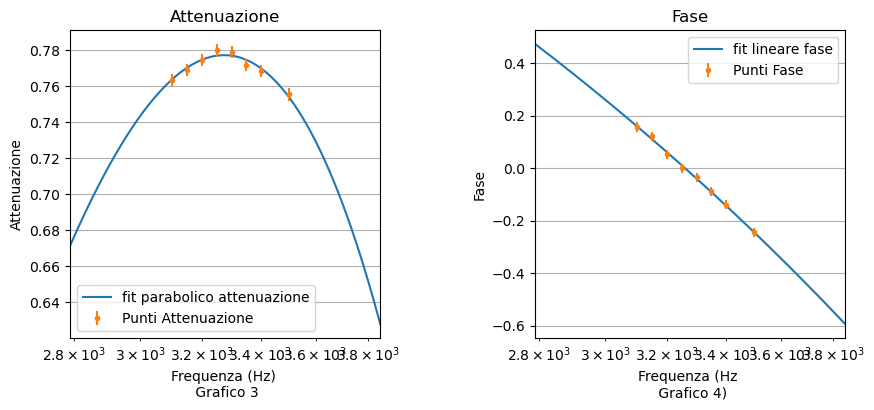

In [40]:
#Grafici di fit

fi, axe = plt.subplots(1, 2, figsize=(10, 4))
x = np.linspace(min(F[i:f])*0.9,max(F[i:f])*1.1,10000)

#attenuazione
axe[0].plot(x,par(x,a,b,c), label = "fit parabolico attenuazione")
axe[0].set_title('Attenuazione')
axe[0].set_xscale('log')
axe[0].grid(True)
axe[0].errorbar(F[i:f], A[i:f], yerr=errA[i:f], fmt = 'o', label = 'Punti Attenuazione', markersize = 3)
axe[0].set_xlim(min(F[i:f])*0.9,max(F[i:f])*1.1)
axe[0].set_xlabel("Frequenza (Hz) \n Grafico 3")
axe[0].set_ylabel("Attenuazione")
axe[0].legend()

#fase
axe[1].plot(x,lin(x,aa,bb), label = "fit lineare fase") 
axe[1].set_title('Fase')
axe[1].set_xscale('log')
axe[1].grid(True)
axe[1].errorbar(F[i:f], phi[i:f], yerr=errphi[i:f], fmt = 'o', label = 'Punti Fase', markersize = 3)
axe[1].set_xlim(min(F[i:f])*0.9,max(F[i:f])*1.1)
axe[1].set_xlabel("Frequenza (Hz \n Grafico 4)")
axe[1].set_ylabel("Fase")
axe[1].legend()

fi.subplots_adjust(wspace=0.5)